# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.


Who: Streaming platform managers and movie marketers looking to maximize profitability and customer satisfaction.

What: Understand how genre, user ratings, and streaming availability relate to movie success.

How: Use genre encoding and rating distributions to highlight audience sentiment. Use bar charts, heatmaps, and scatter plots to communicate relationships between movie metadata and outcomes like average rating.

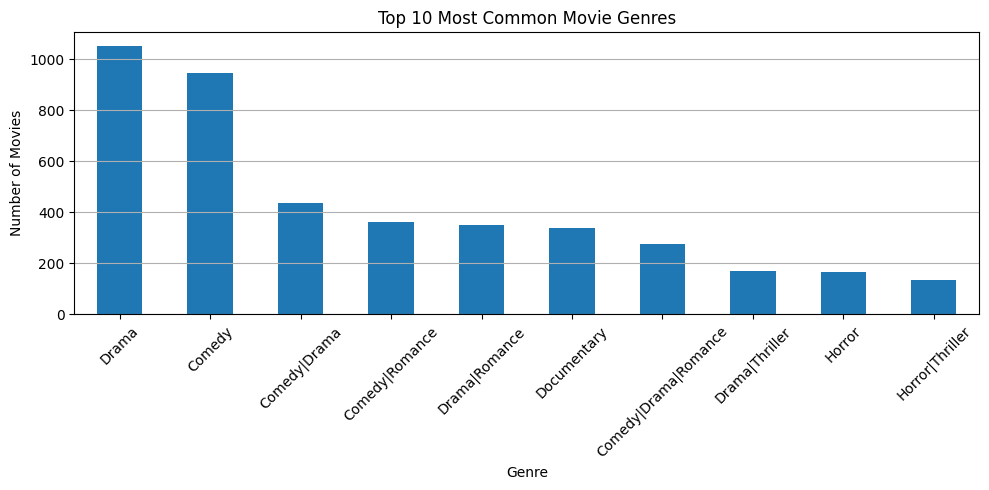

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df_movies = pd.read_csv("movies.csv")
df_genres_split = df_movies['genres'].str.get_dummies(sep=',')

genre_counts = df_genres_split.sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
genre_counts.plot(kind='bar')
plt.title("Top 10 Most Common Movie Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


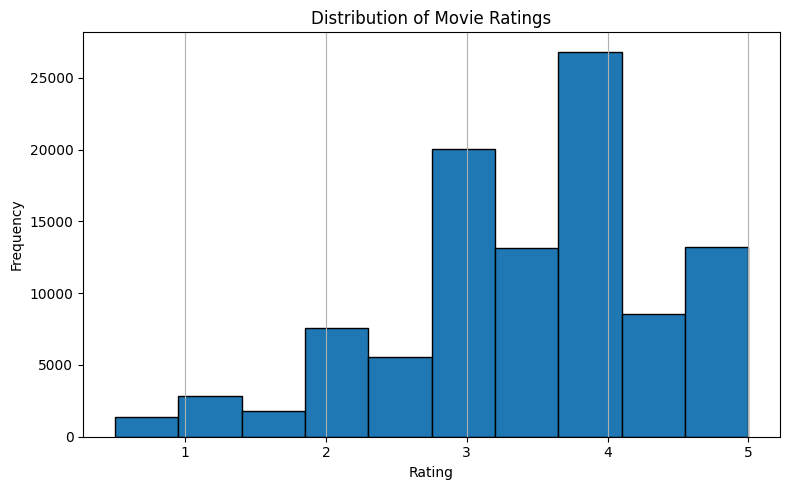

In [12]:
df_ratings = pd.read_csv("ratings.csv")

plt.figure(figsize=(8, 5))
df_ratings["rating"].hist(bins=10, edgecolor='black')
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 3. Homework - work with your own data

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [14]:
df_movies = pd.read_csv("movies.csv")
df_ratings = pd.read_csv("ratings.csv")
df_tags = pd.read_csv("tags.csv")

print("Movies:")
display(df_movies.head())

print("Ratings:")
display(df_ratings.head())

print("Tags:")
display(df_tags.head())


Movies:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Ratings:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Tags:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [15]:
print("Movies:")
df_movies.info()

print("\nRatings:")
df_ratings.info()

print("\nTags:")
df_tags.info()


Movies:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Tags:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1 

In [16]:
print("Nulls in movies.csv:")
print(df_movies.isnull().sum())

print("\nNulls in ratings.csv:")
print(df_ratings.isnull().sum())

print("\nNulls in tags.csv:")
print(df_tags.isnull().sum())


Nulls in movies.csv:
movieId    0
title      0
genres     0
dtype: int64

Nulls in ratings.csv:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Nulls in tags.csv:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [17]:
print(f"Duplicate rows in movies: {df_movies.duplicated().sum()}")
print(f"Duplicate rows in ratings: {df_ratings.duplicated().sum()}")
print(f"Duplicate rows in tags: {df_tags.duplicated().sum()}")


Duplicate rows in movies: 0
Duplicate rows in ratings: 0
Duplicate rows in tags: 0


In [18]:
print("Ratings Stats:")
print(df_ratings["rating"].describe())

mode_rating = df_ratings["rating"].mode()[0]
print(f"\nMode rating: {mode_rating}")


Ratings Stats:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

Mode rating: 4.0


In [19]:
df_genres_split = df_movies["genres"].str.get_dummies(sep='|')
df_movies_with_genres = pd.concat([df_movies, df_genres_split], axis=1)

print("Genres expanded:")
display(df_movies_with_genres.head())


Genres expanded:


,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

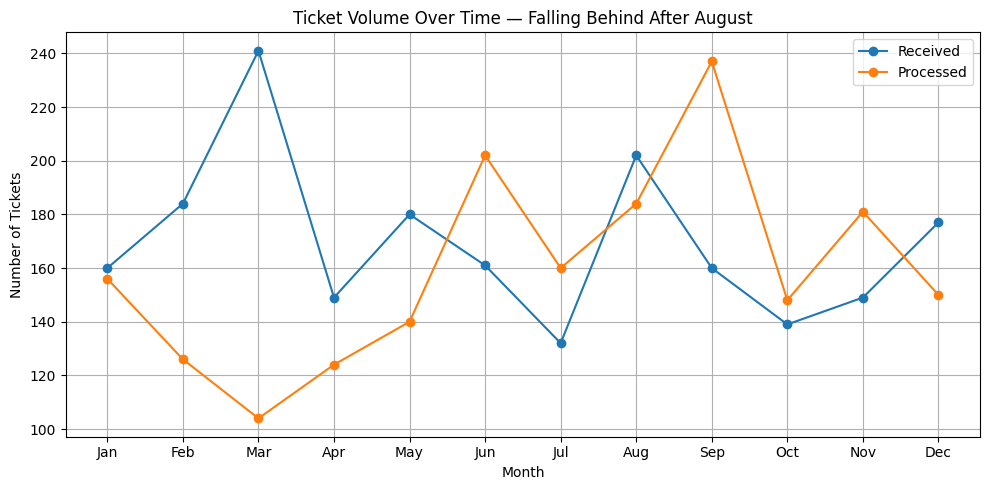

In [20]:
import matplotlib.pyplot as plt

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
received = [160, 184, 241, 149, 180, 161, 132, 202, 160, 139, 149, 177]
processed = [156, 126, 104, 124, 140, 202, 160, 184, 237, 148, 181, 150]

plt.figure(figsize=(10, 5))
plt.plot(months, received, label='Received', marker='o')
plt.plot(months, processed, label='Processed', marker='o')
plt.title("Ticket Volume Over Time — Falling Behind After August")
plt.xlabel("Month")
plt.ylabel("Number of Tickets")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
